In [204]:
import matplotlib.pyplot as plt
from tnia.simulation.phantoms import ramp2d, random_circles
from tnia.simulation.test_images import circles_on_ramp_background

111 178 186 353
132 133 358 246
133 446 259 368
114 804 484 257
129 295 645 323


Text(0.5, 1.0, 'ramp imaged')

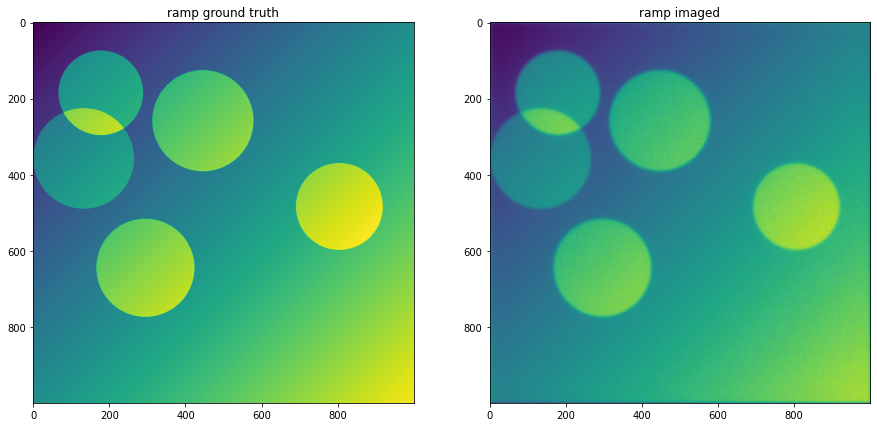

In [205]:
ramp_truth, ramp = circles_on_ramp_background()

fig, ax = plt.subplots(1,2,figsize=(15,8))
ax[0].imshow(ramp_truth)
ax[0].set_title('ramp ground truth')
ax[1].imshow(ramp)
ax[1].set_title('ramp imaged')

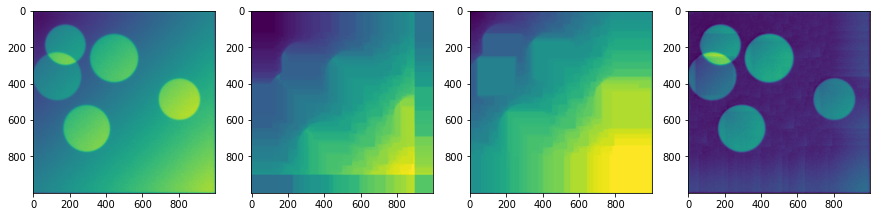

In [206]:
from scipy.ndimage import grey_erosion, grey_dilation

size=200
eroded = grey_erosion(ramp, size)
opened = grey_dilation(eroded, size)

fig, ax = plt.subplots(1,4,figsize=(15,8))
ax[0].imshow(ramp)
ax[1].imshow(eroded)
ax[2].imshow(opened)
ax[3].imshow(ramp-opened)

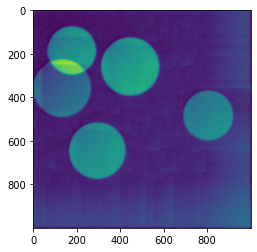

In [208]:
from skimage.morphology import white_tophat, disk, square
ramp_bgs =white_tophat(ramp, square(size))
plt.imshow(ramp_bgs)

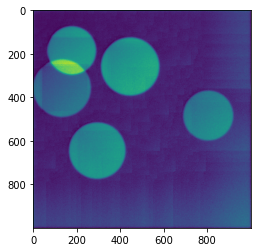

In [209]:
import pyclesperanto_prototype as cle

# select a specific OpenCL / GPU device and see which one was chosen
cle.select_device('RTX')

ramp_gpu = cle.push(ramp)
ramp_bgs_clij = cle.top_hat_box(ramp_gpu, radius_x=size/2, radius_y=size/2)
plt.imshow(ramp_bgs_clij)


Text(0.5, 1.0, 'background subtracted')

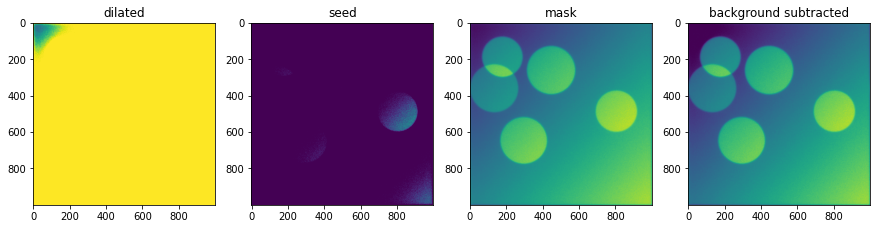

In [213]:
from tnia.background.dilate_subtract import dilate_subtract
ramp_bgs_dilate, dilated, seed, mask = dilate_subtract(ramp, 95)

fig, ax = plt.subplots(1,4,figsize=(15,8))
ax[0].imshow(dilated)
ax[0].set_title('dilated')
ax[1].imshow(seed)
ax[1].set_title('seed')
ax[2].imshow(mask)
ax[2].set_title('mask')
ax[3].imshow(ramp_bgs_dilate)
ax[3].set_title('background subtracted')

In [187]:
ramp.min()

866

In [182]:
# start napari
import napari
viewer = napari.Viewer()

viewer.add_image(seed)
viewer.add_image(dilated)



<Image layer 'dilated' at 0x25129964f40>

Exception in callback BaseAsyncIOLoop._handle_events(6836, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(6836, 1)>
Traceback (most recent call last):
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\tornado\platform\asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 448, in _handle_events
    self._handle_recv()
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 477, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-pac